In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [8]:
movie_df = pd.read_csv('C:/Users/CHAN/Downloads/movie_lense/movies.csv')
movie_df = movie_df[movie_df.genres != '(no genres listed)']
movie_df = pd.concat([movie_df.drop('genres', axis=1), movie_df.genres.str.get_dummies(sep='|')], axis=1)
movie_df.head(10)
movie_df.describe()
#Delete movies without genres, and used one hot encoding

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000,53832.000000
mean,108423.852430,0.132449,0.075550,0.049469,0.051066,0.296404,0.094832,0.095074,0.448506,0.048986,0.006762,0.103191,0.003660,0.020675,0.051512,0.137688,0.063977,0.152623,0.033809,0.025598
std,60579.038862,0.338982,0.264279,0.216847,0.220135,0.456675,0.292986,0.293319,0.497346,0.215840,0.081952,0.304212,0.060384,0.142297,0.221042,0.344575,0.244714,0.359627,0.180739,0.157935
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66137.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121595.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,159839.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193886.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from datetime import datetime
dt_parser = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%d/%m/%Y %H:%M:%S")

rating_df = pd.read_csv('C:/Users/CHAN/Downloads/movie_lense/ratings.csv', parse_dates=['timestamp'],  date_parser=dt_parser)
rating_df.head(10)
rating_df.describe()

In [16]:
from datetime import datetime
dt_parser = lambda x: datetime.utcfromtimestamp(int(x)).strftime("%d/%m/%Y %H:%M:%S")

tag_df = pd.read_csv('C:/Users/CHAN/Downloads/movie_lense/tags.csv', parse_dates=['timestamp'],  date_parser=dt_parser)
tag_df.head(10)
tag_df.describe()

,userId,movieId
count,1.108997e+06,1.108997e+06
mean,1.248016e+05,5.492109e+04
std,7.726964e+04,5.618123e+04
min,1.400000e+01,1.000000e+00
25%,7.340600e+04,3.362000e+03
50%,1.030130e+05,4.374400e+04
75%,1.883600e+05,9.682100e+04
max,2.832210e+05,1.938680e+05


In [9]:
oscar_df = pd.read_csv('C:/Users/CHAN/Downloads/the_oscar_award.csv', encoding='latin-1',engine='python')
oscar_df
oscar_df.describe()

,year_film,year_ceremony,ceremony
count,10395.000000,10395.000000,10395.000000
mean,1974.474555,1975.474555,47.500144
std,26.145642,26.145642,26.102352
min,1927.000000,1928.000000,1.000000
25%,1951.000000,1952.000000,24.000000
50%,1974.000000,1975.000000,47.000000
75%,1998.000000,1999.000000,71.000000
max,2019.000000,2020.000000,92.000000


In [10]:
industry_df = pd.read_csv('C:/Users/CHAN/Downloads/movie_industry.csv', encoding='latin-1',engine='python')
industry_df = industry_df[industry_df.budget != 0.0]
industry_df = industry_df[industry_df.votes > 1000]
#remove without budget_info
industry_df.describe()

,budget,gross,runtime,score,votes,year
count,4.610000e+03,4.610000e+03,4610.000000,4610.000000,4.610000e+03,4610.000000
mean,3.629965e+07,4.634142e+07,107.649241,6.361085,9.627969e+04,2002.565510
std,4.003567e+07,6.640595e+07,18.053799,1.010176,1.496566e+05,8.426275
min,6.000000e+03,3.090000e+02,69.000000,1.500000,1.008000e+03,1986.000000
25%,1.000000e+07,6.509935e+06,96.000000,5.800000,1.639525e+04,1996.000000
50%,2.300000e+07,2.400017e+07,104.000000,6.400000,4.428000e+04,2003.000000
75%,4.700000e+07,5.804627e+07,117.000000,7.100000,1.101975e+05,2010.000000
max,3.000000e+08,9.366622e+08,280.000000,9.300000,1.861666e+06,2016.000000


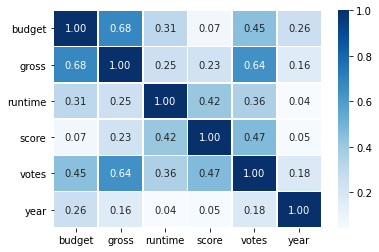

In [17]:
#correlation between each field of industry_df
sns.heatmap(data = industry_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

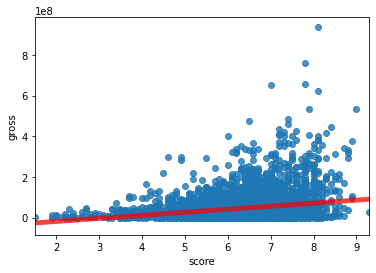

In [19]:
sns.regplot(x=industry_df["score"], y=industry_df["gross"], line_kws={"color":"r","alpha":0.7,"lw":5})